<a href="https://colab.research.google.com/github/abdelh17/COMP432-GroupG/blob/main/432_project_GroupG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Overview

# Import Libraries


In [ ]:
# import the necessary libraries

from PIL import Image, ImageOps, ImageEnhance
import os
import matplotlib.pyplot as plt
import random
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Download all the datasets

In [ ]:
import os

# Paths to the main dataset folders
folder_path_d1 = '/content/drive/MyDrive/Concordia/comp_432/Colorectal Cancer'
folder_path_d2 = '/content/drive/MyDrive/Concordia/comp_432/Prostate Cancer'
folder_path_d3 = '/content/drive/MyDrive/Concordia/comp_432/Animal Faces'

# Subdirectories for each dataset
subdirs_d1 = ['MUS', 'NORM', 'STR']  # Example subdirectories for Dataset 1
subdirs_d2 = ['gland', 'nongland', 'tumor']  # Replace with actual names for Dataset 2
subdirs_d3 = ['cat', 'dog', 'wild']  # Replace with actual names for Dataset 3

# Function to list files in a subdirectory
def list_files_in_subdirectory(base_path, subdirectories, file_extension):
    dataset = []
    for subdir in subdirectories:
        subdir_path = os.path.join(base_path, subdir)
        files = [os.path.join(subdir_path, f) for f in os.listdir(subdir_path) if f.endswith(file_extension)]
        dataset.append(files)
    return dataset

# Create lists of images for each dataset
try:
  dataset1 = list_files_in_subdirectory(folder_path_d1, subdirs_d1, '.tif')
  dataset2 = list_files_in_subdirectory(folder_path_d2, subdirs_d2, '.jpg')
  dataset3 = list_files_in_subdirectory(folder_path_d3, subdirs_d3, '.jpg')
except Exception as e:
  print(e)

# Display one image of each


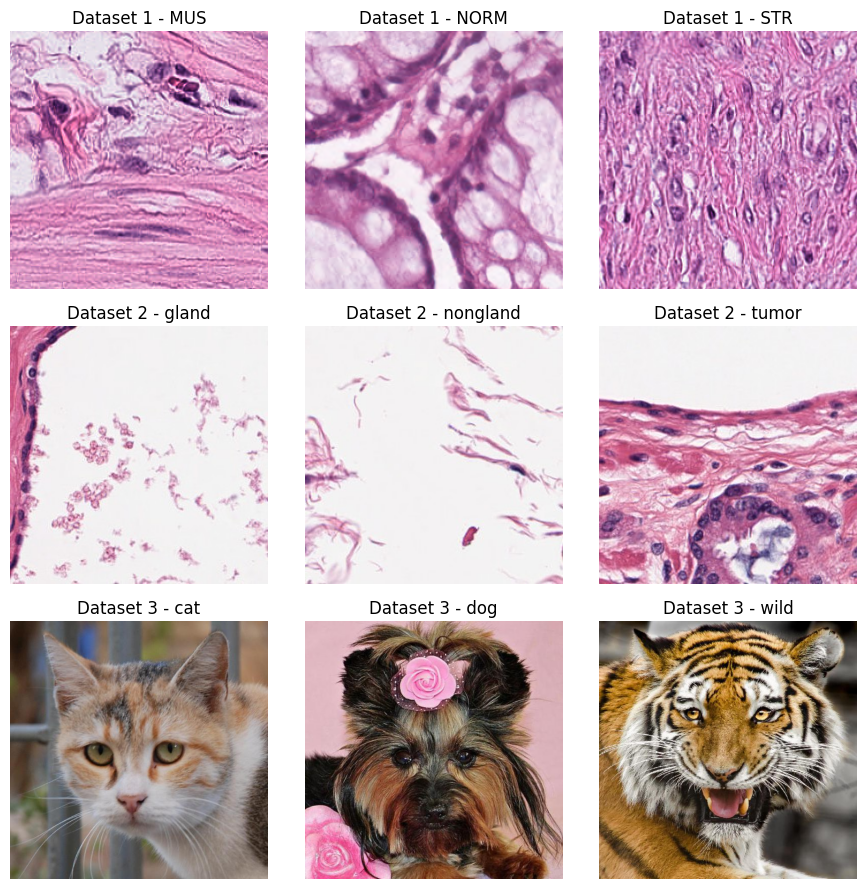

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Assuming dataset1, dataset2, dataset3 contain the paths to the first image in each subdirectory

# Combine all subdirectories in a list for easier access
all_subdirs = [subdirs_d1, subdirs_d2, subdirs_d3]

# Combine all datasets in a list for easier access
all_datasets = [dataset1, dataset2, dataset3]

# Plot the first image of each subfolder for each dataset in a 3x3 grid
plt.figure(figsize=(9, 9))
for i in range(3):  # Loop through datasets
    for j in range(3):  # Loop through subdirectories
        plt.subplot(3, 3, i * 3 + j + 1)
        image_list = all_datasets[i][j]
        if image_list:  # Check if there are any images
            image_path = image_list[0]  # Get the first image path
            image = Image.open(image_path)
            plt.imshow(image)
            plt.title(f'Dataset {i+1} - {all_subdirs[i][j]}')
        else:
            plt.title(f'Dataset {i+1} - {all_subdirs[i][j]} (No images)')
        plt.axis('off')
plt.tight_layout()
plt.show()


# Pixel-wise normalization
We calculate the mean for each pixel position across all images in the dataset. This results in a mean image (or a mean value for each channel at each pixel location). Each pixel in each image is then subtracted by its corresponding mean pixel value from the mean image.


In [ ]:
# Initialize sum for mean image calculation
sum_image = np.zeros_like(np.array(Image.open(dataset1[0][0])).astype(np.float32))
count = 0

# Sum pixel values for the mean image
for file in dataset1[0]:
    file_path = os.path.join(folder_path_d1, file)
    image = Image.open(file_path)
    np_image = np.array(image).astype(np.float32)
    sum_image += np_image
    count += 1

# Calculate the mean image
mean_image = sum_image / count

# Function to normalize one image
def normalize_image_pixelwise(image, mean_image):
    np_image = np.array(image).astype(np.float32)
    np_image -= mean_image  # Subtract the mean image
    return np_image

# Augmentation techniques
rotation, flip (axis), brightness, cropping and contrast

In [14]:
# Define augmentation functions

# Rotation (90, 180, 270 degres)
def rotate_image(image):
    angle = random.choice([90, 180, 270])
    return image.rotate(angle)

# Flipping
def flip_image(image):
    return ImageOps.mirror(image)

# Brightness
def adjust_brightness(image):
    enhancer = ImageEnhance.Brightness(image)
    factor = 1.5
    return enhancer.enhance(factor)

# Cropping
def crop_image(image):
    width, height = image.size
    new_width, new_height = width // 2, height // 2
    left = (width - new_width) // 2
    top = (height - new_height) // 2
    right = (width + new_width) // 2
    bottom = (height + new_height) // 2
    return image.crop((left, top, right, bottom))

# Contrast
def adjust_contrast(image, min=1, max=5):
    enhancer = ImageEnhance.Contrast(image)
    factor = random.randrange(min, max) # random factor between 1 and 5 (not 0 ...)
    return enhancer.enhance(factor)

# Issue related to applying contrast, factor = 0.
We initial apply different degree of contrast by generating a contrast factor between 0 and 5. The images with a factor of 0 were fully gray so we decide to put the lower limit at 1.

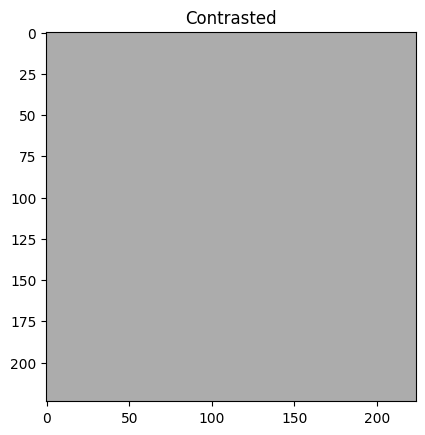

In [19]:
file_path = os.path.join(folder_path_d1, dataset1[0][0])
image = Image.open(file_path)

plt.imshow(adjust_contrast(image, min=0, max=1))
plt.title("Contrasted")
plt.show()

# Apply Augmentation & Normalization

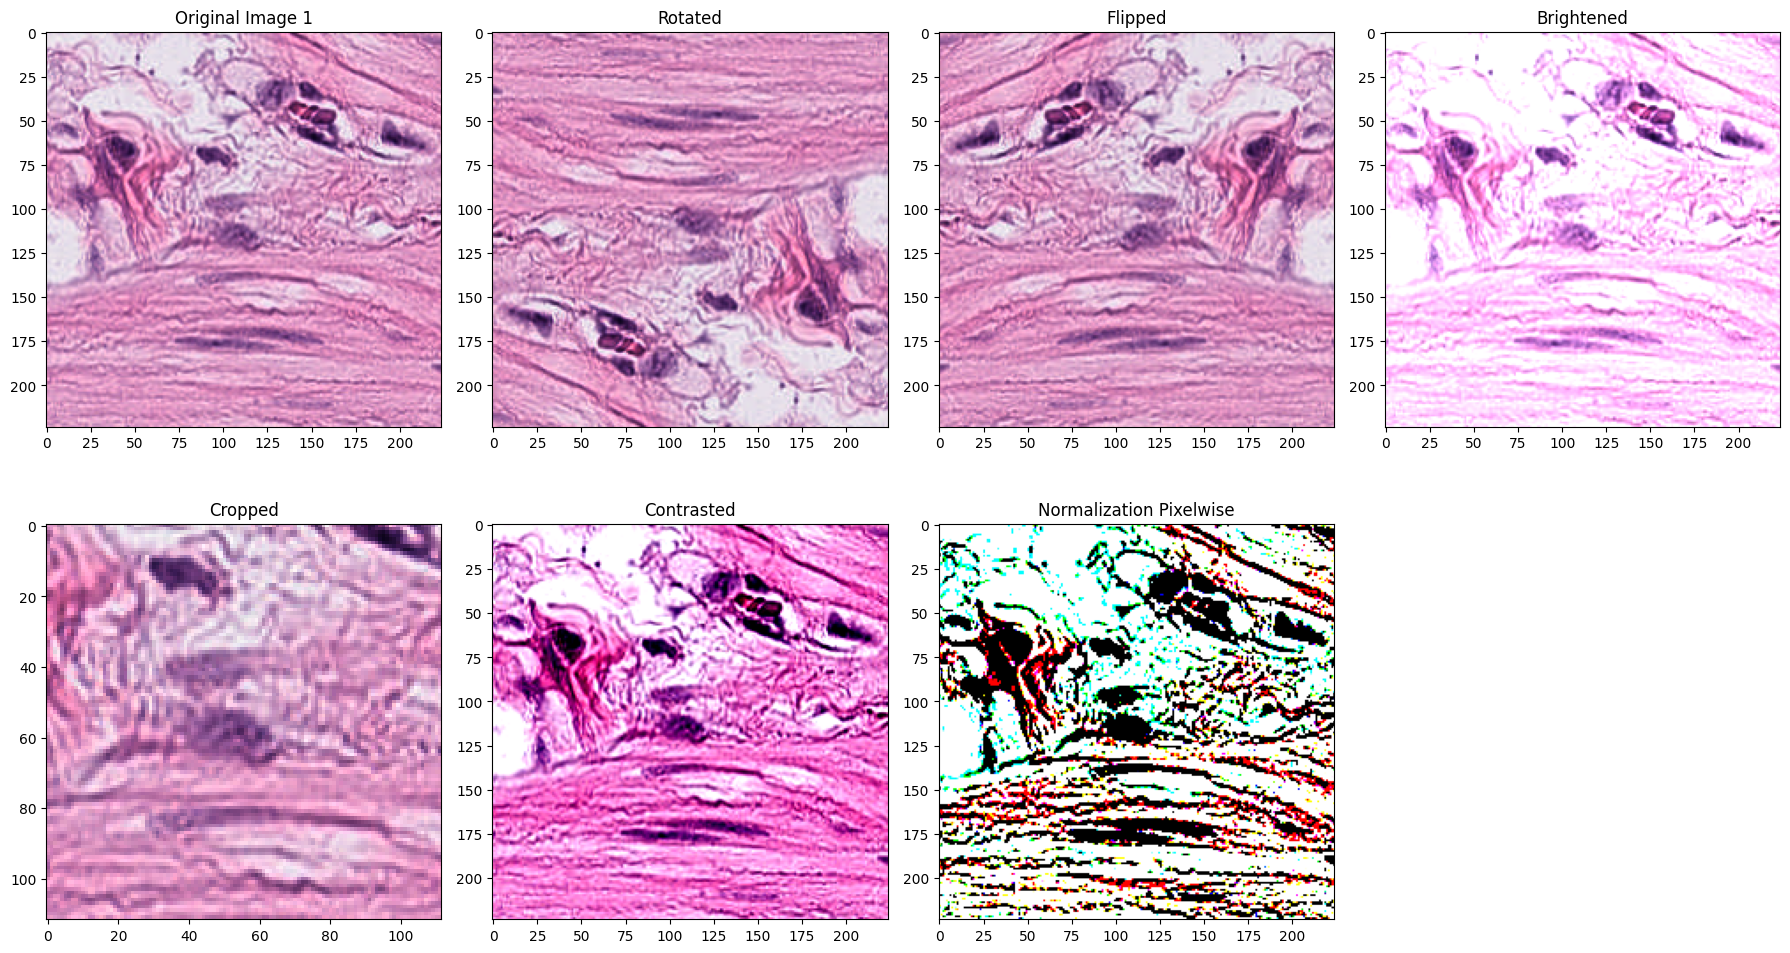

In [ ]:
for i, file in enumerate(dataset1[0][:1]):
    file_path = os.path.join(folder_path_d1, file)
    image = Image.open(file_path)

    # Perform augmentations
    rotated_image = rotate_image(image)
    flipped_image = flip_image(image)
    brightened_image = adjust_brightness(image)
    cropped_image = crop_image(image)
    contrasted_image = adjust_contrast(image)
    normalized_image_pixelwise = normalize_image_pixelwise(image, mean_image)

    # Display the original and augmented images
    plt.figure(figsize=(18, 10))

    plt.subplot(2, 4, 1)
    plt.imshow(image)
    plt.title(f"Original Image {i+1}")

    plt.subplot(2, 4, 2)
    plt.imshow(rotated_image)
    plt.title("Rotated")

    plt.subplot(2, 4, 3)
    plt.imshow(flipped_image)
    plt.title("Flipped")

    plt.subplot(2, 4, 4)
    plt.imshow(brightened_image)
    plt.title("Brightened")

    plt.subplot(2, 4, 5)
    plt.imshow(cropped_image)
    plt.title("Cropped")

    plt.subplot(2, 4, 6)
    plt.imshow(contrasted_image)
    plt.title("Contrasted")

    plt.subplot(2, 4, 7)
    plt.imshow(normalized_image_pixelwise)
    plt.title("Normalization Pixelwise")

    plt.tight_layout()
    plt.show()